# Plot dose depth dose and uncertainty

Use the output of the following simulation:
- Folder: dosimetry/
- Macros: ex1.mac


In [1]:
# Tell Jupyter to plot figure right in the page
%matplotlib inline

# Module with plot capabilities
import matplotlib.pyplot as plt

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Modules with reading/write folder/file functions
import os
from pathlib import Path

In [2]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)

The Current Working Directory (CWD) is: 
 /Users/dsarrut/src/gate/dqprm/2021/gate-exercices/dosimetry


In [3]:
# Display the content of a folder
output_folder = Path('./output_ref')
if (not output_folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(output_folder))
else:
    print('The folder and contains the following files:'.format(output_folder))
    p = output_folder.glob('**/*')
    files = [x for x in p if x.is_file()]
    for x in files:
        print(x)

The folder and contains the following files:
output_ref/3d-pat-proton-Dose-Uncertainty.raw
output_ref/3d-pat-Edep.mhd
output_ref/profile-pat-Edep.txt
output_ref/3d-pat-proton-Edep.raw
output_ref/depth-pat-Edep.txt
output_ref/profile-pat-Edep-Squared.txt
output_ref/depth-pat-Edep-Uncertainty.txt
output_ref/gamma-stat.txt
output_ref/gamma-profile-Edep-Squared.txt
output_ref/profile-pat-proton-Edep-Squared.txt
output_ref/profile-pat-proton-Edep.txt
output_ref/profile-pat-proton-Edep-Uncertainty.txt
output_ref/gamma-depth-Edep-Uncertainty.txt
output_ref/3d-pat-proton-Edep.mhd
output_ref/depth-pat-proton-Dose.txt
output_ref/depth-pat-proton-Edep-Squared.txt
output_ref/3d-pat-Edep.raw
output_ref/3d-pat-proton-Dose-Uncertainty.mhd
output_ref/3d-pat-Edep-Squared.raw
output_ref/3d-pat-proton-Dose-Squared.mhd
output_ref/gamma-depth-Edep.txt
output_ref/3d-pat-proton-Dose.mhd
output_ref/depth-pat-proton-Edep.txt
output_ref/3d-pat-Edep-Uncertainty.mhd
output_ref/gamma-profile-Edep.txt
output_ref/3d

In [4]:
# Set the filenames (d = depth, p = profile)
f_d_edep = os.path.join(output_folder, 'gamma-depth-Edep.txt')
f_d_uncert = os.path.join(output_folder, 'gamma-depth-Edep-Uncertainty.txt')
f_p_edep = os.path.join(output_folder, 'gamma-profile-Edep.txt')
f_p_uncert = os.path.join(output_folder, 'gamma-profile-Edep-Uncertainty.txt')

In [5]:
# Load data from txt files
d_edep = np.loadtxt(f_d_edep)
d_uncert = np.loadtxt(f_d_uncert)
p_edep = np.loadtxt(f_p_edep)
p_uncert = np.loadtxt(f_p_uncert)

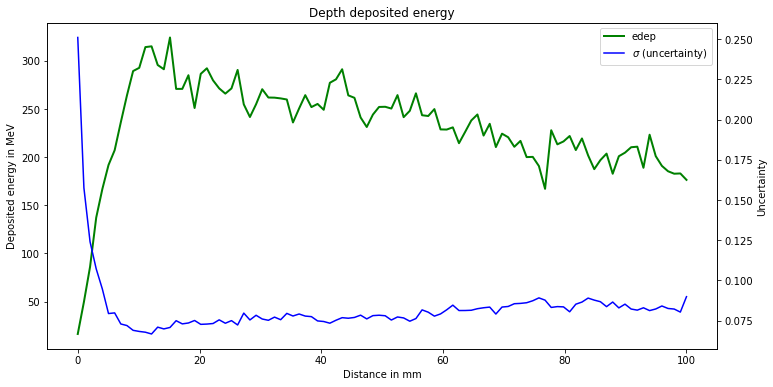

In [6]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

# X values from 0 to n, n is the length of d_edep
n = len(d_edep)
x = np.linspace(0, n, n)

# First curve, gamma depth in green
y = d_edep
c1 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Second curve, gamma uncertainty in blue, share the same x axis, but use a
# different y axis
y = d_uncert
ax2 = ax.twinx()
c2 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c1+c2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Depth deposited energy')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')

# save on disk (optional)
plt.savefig('depth_dose.png',dpi=300,bbox_inches="tight",pad_inches=None)

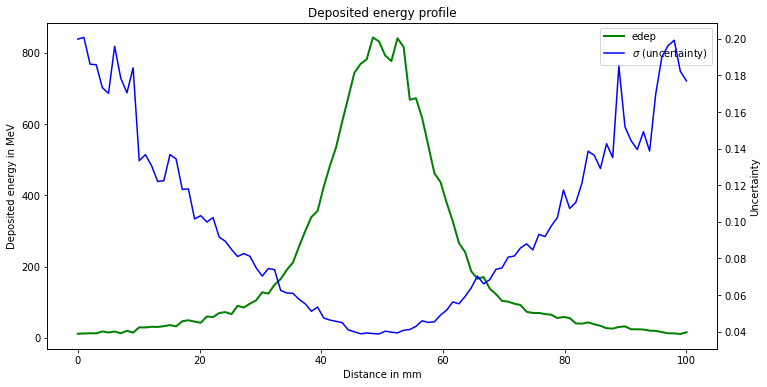

In [7]:
# Declare a figure 
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

# Third curve, gamma profile in green
n = len(p_edep)
x = np.linspace(0, n, n)
y = p_edep
c3 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Last curve, gamma uncertainty profile
y = p_uncert
ax2 = ax.twinx()
c4 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c3+c4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Deposited energy profile')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')